# Численные методы оптимизации
## Метод дихотомии-1

In [ ]:
import numpy as np
def DichotomyOneCalc(func, a, b, delta = 0.1, eps = 0.001):
    while b - a > delta:
        x1 = - eps + (b + a) / 2. 
        x2 = eps + (b + a) / 2. 
        if func(x1) < func(x2):
            b = x2
        else:
            a = x1
    return [a, b]

## Метод золотого сечения

In [6]:
def GoldenSection(func, a, b, delta = 0.1):
    tay = (np.sqrt(5) - 1) / 2.
    y = a + (b - a) * tay
    x = b - (b - a) * tay
    Qy = func(y)
    Qx = func(x)
    while b - a > delta:
        if Qx < Qy:
            b = y
            y = x
            Qy = Qx
            x = b - (b - a) * tay
            Qx = func(x)
        else:
            a = x
            x = y
            Qx = Qy
            y = a + (b - a) * tay
            Qy = func(y)
    return [a, b]

In [244]:
def test_func(x):
    return np.abs(np.log(x))
result_interval = DichotomyOneCalc(test_func, 0.1, 30000, 0.0001,0.0000001)
val = test_func(np.mean(result_interval))
print(result_interval,"Value in aver:", val)

[0.9999898832231368, 1.000045962391349] Value in aver: 1.7922646631185512e-05


In [245]:
GoldenSection(test_func, 0.1, 30000, 0.0001)
result_interval = GoldenSection(test_func, 0.1, 30000, 0.0001)
val = test_func(np.mean(result_interval))
print(result_interval,"Value in aver:", val)

[0.9999420067422217, 1.000023033144679] Value in aver: 1.7480209327525845e-05


## Метод деления на три

In [233]:
import matplotlib.patches as pth
from matplotlib.patches import Rectangle as Rec
from time import sleep

class Rectangle:
    def __init__(self,x, y, w, h):
        self.x = x
        self.y = y
        self.h = h
        self.w = w
    
    def diam(self):
        return np.sqrt(self.h ** 2 + self.w ** 2)

    def get_center_coords(self):
        return [self.x + 0.5 * self.w, self.y + 0.5 * self.h]
    
    def split_on_three(self):
        if self.h >= self.w:
            return [Rectangle(self.x, self.y, self.w, self.h / 3.), \
                   Rectangle(self.x, self.y + self.h /3., self.w, self.h / 3.), \
                   Rectangle(self.x, self.y + 2 * self.h / 3., self.w, self.h / 3.)]
        else:
            return [Rectangle(self.x, self.y, self.w / 3., self.h), \
                   Rectangle(self.x + self.w / 3, self.y, self.w / 3., self.h), \
                   Rectangle(self.x + 2 * self.w / 3., self.y, self.w / 3., self.h)]
        
    def draw(self, ax):
        ax.add_patch(Rec((self.x,self.y), self.w, self.h, fill = False))

def make_data(func, x, y, w, h):
    X = np.arange(x, x + w, 0.05)
    Y = np.arange(y, y + h, 0.05)
    xgrid, ygrid = np.meshgrid(X, Y)
    zgrid = func(xgrid, ygrid)
    return xgrid, ygrid, zgrid             

def test_func(x, y):
    return x ** 2 + y ** 2 

def DivisionThreeMethod(func, x, y, w, h, l, eps, draw_flag = False):
    
    def get_eval(Q, l, P):
        return Q - l * P.diam() / 2.
    
    rectangles = []
    E = Rectangle(x, y, w, h)
    rectangles += E.split_on_three()
    
    Q = [func(*rec.get_center_coords()) for rec in rectangles]
    arg_min_Q = Q.index(min(Q)) 
    
    Z = [get_eval(q, l, rec) for q, rec in zip(Q,rectangles)]
    arg_min_Z = Z.index(min(Z))
    
    while Q[arg_min_Q] - Z[arg_min_Z] > eps:
        Q += [func(*rec.get_center_coords()) for rec in rectangles[arg_min_Z].split_on_three()]
        Z += [get_eval(q, l, rec) for q, rec in zip(Q[-3:], rectangles[arg_min_Z].split_on_three())]
        rectangles += rectangles[arg_min_Z].split_on_three()
        rectangles.pop(arg_min_Z)
        Q.pop(arg_min_Z)
        Z.pop(arg_min_Z)
        arg_min_Q = Q.index(min(Q))
        arg_min_Z = Z.index(min(Z))
    
    if draw_flag:
        xgrid, ygrid, zgrid = make_data(func, x, y, w, h)
        levels = np.cumsum(np.arange(0.1, 15 , 1))
        cs = plt.contour(xgrid, ygrid, zgrid, levels)
        plt.clabel(cs, colors="#000000")
        [r.draw(ax) for r in rectangles]
        plt.xlim(x,x + w)
        plt.ylim(y ,y + h)
        plt.show()
    return Q[arg_min_Q], rectangles[arg_min_Q]

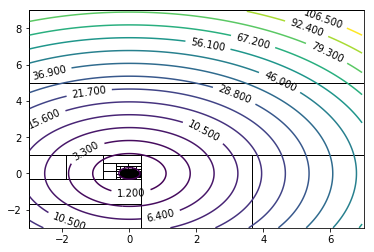

3397


In [234]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.gca()
resQ, resR = DivisionThreeMethod(test_func,-3 , -3, 10, 12,1,0.001, draw_flag = True)

In [230]:
resQ, resR.get_center_coords()

(9.016475958761179, [-0.0027434842249655393, 3.0027434842249656])